# Machine Learning

In [1]:
# Libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, metrics
import joblib

## Datasets

In [2]:
dados = pd.read_csv("datasets/outputDetailedSubdomainsDataOccurrence_Reshape_Percentagens_Wesley.csv")
dados.head(10)

,Dataset,subDominio,feature_a,feature_b,feature_c,feature_d,feature_e,feature_f,feature_g,feature_h,feature_i,feature_j
0,1,SecurityPublic,100.0,41.67,0.0,61.90,55.56,62.5,75.0,66.67,53.85,0.0
1,2,SecurityPublic,100.0,41.67,0.0,57.14,55.56,50.0,75.0,66.67,38.46,0.0
2,3,SecurityPublic,100.0,41.67,0.0,57.14,33.33,62.5,50.0,66.67,53.85,0.0
3,4,SecurityPublic,100.0,41.67,0.0,52.38,55.56,62.5,75.0,66.67,53.85,0.0
4,5,SecurityPublic,100.0,41.67,0.0,61.90,33.33,62.5,50.0,66.67,53.85,0.0
5,6,SecurityPublic,100.0,41.67,0.0,52.38,44.44,62.5,75.0,66.67,46.15,0.0
6,7,UrbanMobility,87.5,91.67,0.0,47.62,0.00,37.5,25.0,33.33,61.54,0.0
7,8,UrbanMobility,75.0,83.33,0.0,42.86,0.00,37.5,25.0,33.33,61.54,0.0
8,9,UrbanMobility,87.5,91.67,0.0,47.62,0.00,37.5,25.0,33.33,61.54,0.0
9,10,UrbanMobility,75.0,83.33,0.0,42.86,0.00,37.5,25.0,33.33,61.54,0.0


In [3]:
dados.head(40)

,Dataset,subDominio,feature_a,feature_b,feature_c,feature_d,feature_e,feature_f,feature_g,feature_h,feature_i,feature_j
0,1,SecurityPublic,100.0,41.67,0.00,61.90,55.56,62.5,75.0,66.67,53.85,0.0
1,2,SecurityPublic,100.0,41.67,0.00,57.14,55.56,50.0,75.0,66.67,38.46,0.0
2,3,SecurityPublic,100.0,41.67,0.00,57.14,33.33,62.5,50.0,66.67,53.85,0.0
3,4,SecurityPublic,100.0,41.67,0.00,52.38,55.56,62.5,75.0,66.67,53.85,0.0
4,5,SecurityPublic,100.0,41.67,0.00,61.90,33.33,62.5,50.0,66.67,53.85,0.0
5,6,SecurityPublic,100.0,41.67,0.00,52.38,44.44,62.5,75.0,66.67,46.15,0.0
6,7,UrbanMobility,87.5,91.67,0.00,47.62,0.00,37.5,25.0,33.33,61.54,0.0
7,8,UrbanMobility,75.0,83.33,0.00,42.86,0.00,37.5,25.0,33.33,61.54,0.0
8,9,UrbanMobility,87.5,91.67,0.00,47.62,0.00,37.5,25.0,33.33,61.54,0.0
9,10,UrbanMobility,75.0,83.33,0.00,42.86,0.00,37.5,25.0,33.33,61.54,0.0


In [4]:
# Dataset informations
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dataset     60 non-null     int64  
 1   subDominio  60 non-null     object 
 2   feature_a   60 non-null     float64
 3   feature_b   60 non-null     float64
 4   feature_c   60 non-null     float64
 5   feature_d   60 non-null     float64
 6   feature_e   60 non-null     float64
 7   feature_f   60 non-null     float64
 8   feature_g   60 non-null     float64
 9   feature_h   60 non-null     float64
 10  feature_i   60 non-null     float64
 11  feature_j   60 non-null     float64
dtypes: float64(10), int64(1), object(1)
memory usage: 5.8+ KB


In [5]:
# Statistics describe 
dados.describe()

,Dataset,feature_a,feature_b,feature_c,feature_d,feature_e,feature_f,feature_g,feature_h,feature_i,feature_j
count,60.00000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000,60.000000,60.0
mean,31.00000,51.458333,36.806000,17.142000,33.095500,31.66600,43.541667,49.583333,47.502500,41.026667,0.0
std,17.90275,28.101253,27.587267,34.573322,22.256506,30.33134,27.472219,27.421563,23.535834,27.267494,0.0
min,1.00000,12.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
25%,15.75000,34.375000,16.670000,0.000000,14.290000,0.00000,37.500000,25.000000,16.670000,23.080000,0.0
50%,31.00000,43.750000,29.165000,0.000000,28.570000,27.77500,37.500000,50.000000,66.670000,38.460000,0.0
75%,46.25000,87.500000,58.330000,0.000000,52.380000,47.22000,62.500000,75.000000,66.670000,61.540000,0.0
max,61.00000,100.000000,91.670000,85.710000,71.430000,100.00000,87.500000,75.000000,66.670000,84.620000,0.0


In [6]:
# Class Distributions
dados["subDominio"].value_counts()

SecurityPublic         6
UrbanMobility          6
SmartGrid              6
SmartHome              6
SmartCampus            6
Agriculture            6
Logistic               6
IndustrialProcesses    6
HealthCare             6
IndependentLiving      6
Name: subDominio, dtype: int64

In [7]:
# Train and test datas
X_train, X_test, Y_train, Y_test = train_test_split(
    dados.drop(["Dataset", "subDominio"], axis=1), 
    dados["subDominio"], 
    test_size=0.3,
    random_state=123)

In [8]:
# Data form
X_train.shape, X_test.shape

((42, 10), (18, 10))

In [9]:
Y_train.shape, Y_test.shape

((42,), (18,))

## KNN Model (K-Nearest Neighbors ou K-Vizinhos Mais Próximos)

In [10]:
# Class intance (Model)

knn = KNeighborsClassifier(n_neighbors=3)

In [11]:
# Fintting model
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
# Predict to test data
predict = knn.predict(X_test)
predict

c:\Users\Flavio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['SmartCampus', 'Logistic', 'SmartGrid', 'Agriculture',
       'IndustrialProcesses', 'HealthCare', 'SmartHome', 'Logistic',
       'IndependentLiving', 'SmartGrid', 'SmartCampus', 'SmartCampus',
       'HealthCare', 'SmartHome', 'UrbanMobility', 'SecurityPublic',
       'SecurityPublic', 'UrbanMobility'], dtype=object)

In [13]:
knn.predict_proba(X_test)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [14]:
# Validation
pd.crosstab(Y_test, predict, rownames=["Real"], colnames=["Predict"], margins=True)

Predict,Agriculture,HealthCare,IndependentLiving,IndustrialProcesses,Logistic,SecurityPublic,SmartCampus,SmartGrid,SmartHome,UrbanMobility,All
Real,,,,,,,,,,,
Agriculture,1,0,0,0,0,0,0,0,0,0,1
HealthCare,0,1,0,0,0,0,0,0,0,0,1
IndependentLiving,0,1,1,0,0,0,0,0,0,0,2
IndustrialProcesses,0,0,0,1,0,0,0,0,0,0,1
Logistic,0,0,0,0,2,0,0,0,0,0,2
SecurityPublic,0,0,0,0,0,2,0,0,0,0,2
SmartCampus,0,0,0,0,0,0,3,0,0,0,3
SmartGrid,0,0,0,0,0,0,0,2,0,0,2
SmartHome,0,0,0,0,0,0,0,0,2,0,2


In [15]:
print(metrics.classification_report(Y_test, predict))
# Macro avg: é a média de um conjunto de classes, sem considerar a proporção que cada classe possui no conjunto dos dados.
# Weighted avg: é a média de um conjunto de classes, considerando a proporção que cada classe possui no conjunto dos dados.

                     precision    recall  f1-score   support

        Agriculture       1.00      1.00      1.00         1
         HealthCare       0.50      1.00      0.67         1
  IndependentLiving       1.00      0.50      0.67         2
IndustrialProcesses       1.00      1.00      1.00         1
           Logistic       1.00      1.00      1.00         2
     SecurityPublic       1.00      1.00      1.00         2
        SmartCampus       1.00      1.00      1.00         3
          SmartGrid       1.00      1.00      1.00         2
          SmartHome       1.00      1.00      1.00         2
      UrbanMobility       1.00      1.00      1.00         2

           accuracy                           0.94        18
          macro avg       0.95      0.95      0.93        18
       weighted avg       0.97      0.94      0.94        18



In [16]:
# Cross Valiudation
scores = cross_val_score(knn, dados.drop(["Dataset", "subDominio"], axis=1), dados["subDominio"], cv=5)
scores

c:\Users\Flavio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Flavio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminate

array([0.91666667, 1.        , 1.        , 1.        , 1.        ])

In [17]:
# K paramn Otimization 

# Range to k value
k_list = list(range(1, 30))
k_values = dict(n_neighbors=k_list)
k_values

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29]}

In [18]:
# Grid search intance
knn_grid = GridSearchCV(knn, k_values, cv=5, scoring="accuracy")

In [19]:
# Fitting model
knn_grid.fit(dados.drop(["Dataset", "subDominio"], axis=1), dados["subDominio"])

c:\Users\Flavio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Flavio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminate

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='accuracy')

In [20]:
print("O melhor valor de vizinhos próximos foi k = {} com o valor {} de acurácia".format(knn_grid.best_params_, knn_grid.best_score_))

O melhor valor de vizinhos próximos foi k = {'n_neighbors': 1} com o valor 0.9833333333333332 de acurácia


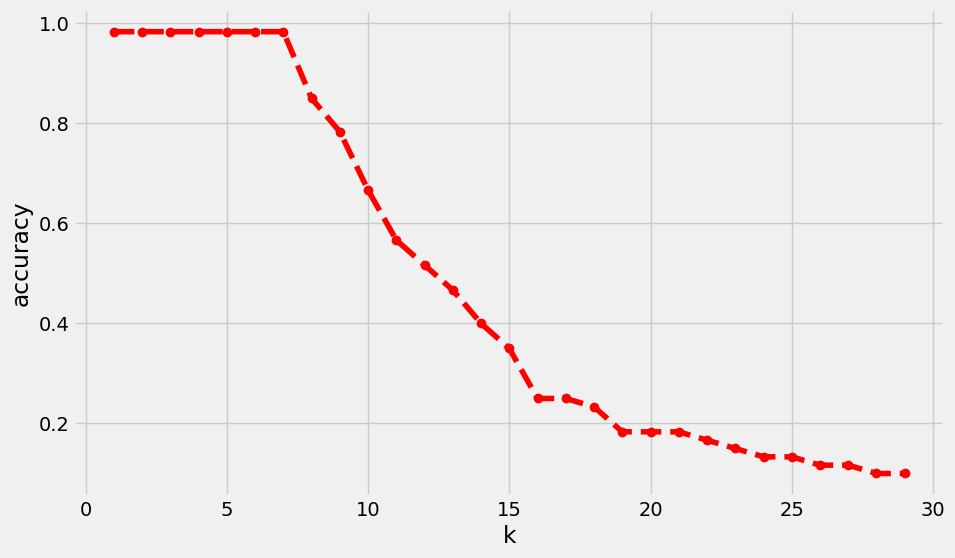

In [21]:
plt.figure(figsize=(10,6))
plt.plot(k_list, knn_grid.cv_results_.get("mean_test_score"), color="red", linestyle="dashed", marker="o")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

In [22]:
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

## SVM Model - Support vector machine (Máquina de Vetores de Suporte)

In [23]:
# Instace model
svm_model = svm.SVC()

In [24]:
# Fititing model
svm_model.fit(X_train, Y_train)

SVC()

In [25]:
predict_svm = svm_model.predict(X_test)
predict_svm

array(['SmartCampus', 'Logistic', 'SmartGrid', 'Agriculture',
       'IndustrialProcesses', 'HealthCare', 'SmartHome', 'Logistic',
       'IndependentLiving', 'SmartGrid', 'SmartCampus', 'SmartCampus',
       'IndependentLiving', 'SmartHome', 'UrbanMobility',
       'SecurityPublic', 'SecurityPublic', 'UrbanMobility'], dtype=object)

In [26]:
# Validation
pd.crosstab(Y_test, predict_svm, rownames=["Real"], colnames=["Predict"], margins=True)

Predict,Agriculture,HealthCare,IndependentLiving,IndustrialProcesses,Logistic,SecurityPublic,SmartCampus,SmartGrid,SmartHome,UrbanMobility,All
Real,,,,,,,,,,,
Agriculture,1,0,0,0,0,0,0,0,0,0,1
HealthCare,0,1,0,0,0,0,0,0,0,0,1
IndependentLiving,0,0,2,0,0,0,0,0,0,0,2
IndustrialProcesses,0,0,0,1,0,0,0,0,0,0,1
Logistic,0,0,0,0,2,0,0,0,0,0,2
SecurityPublic,0,0,0,0,0,2,0,0,0,0,2
SmartCampus,0,0,0,0,0,0,3,0,0,0,3
SmartGrid,0,0,0,0,0,0,0,2,0,0,2
SmartHome,0,0,0,0,0,0,0,0,2,0,2


In [27]:
print(metrics.classification_report(Y_test, predict_svm))

                     precision    recall  f1-score   support

        Agriculture       1.00      1.00      1.00         1
         HealthCare       1.00      1.00      1.00         1
  IndependentLiving       1.00      1.00      1.00         2
IndustrialProcesses       1.00      1.00      1.00         1
           Logistic       1.00      1.00      1.00         2
     SecurityPublic       1.00      1.00      1.00         2
        SmartCampus       1.00      1.00      1.00         3
          SmartGrid       1.00      1.00      1.00         2
          SmartHome       1.00      1.00      1.00         2
      UrbanMobility       1.00      1.00      1.00         2

           accuracy                           1.00        18
          macro avg       1.00      1.00      1.00        18
       weighted avg       1.00      1.00      1.00        18



In [28]:
# Imprime as métricas: 'precisão, revocação e Medida F1.
resultados = cross_val_predict(svm_model, X_train, Y_train, cv=5)
print(metrics.classification_report(Y_train, resultados))

c:\Users\Flavio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


                     precision    recall  f1-score   support

        Agriculture       1.00      1.00      1.00         5
         HealthCare       1.00      1.00      1.00         5
  IndependentLiving       1.00      1.00      1.00         4
IndustrialProcesses       1.00      1.00      1.00         5
           Logistic       1.00      1.00      1.00         4
     SecurityPublic       1.00      1.00      1.00         4
        SmartCampus       1.00      1.00      1.00         3
          SmartGrid       1.00      1.00      1.00         4
          SmartHome       1.00      1.00      1.00         4
      UrbanMobility       1.00      1.00      1.00         4

           accuracy                           1.00        42
          macro avg       1.00      1.00      1.00        42
       weighted avg       1.00      1.00      1.00        42



In [29]:
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

## Random-Forest Model

In [30]:
# Model instance
rf_model = RandomForestClassifier()

In [31]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [32]:
predict_rf = rf_model.predict(X_test)

In [33]:
# Validation
pd.crosstab(Y_test, predict_rf, rownames=["Real"], colnames=["Predict"], margins=True)

Predict,Agriculture,HealthCare,IndependentLiving,IndustrialProcesses,Logistic,SecurityPublic,SmartCampus,SmartGrid,SmartHome,UrbanMobility,All
Real,,,,,,,,,,,
Agriculture,1,0,0,0,0,0,0,0,0,0,1
HealthCare,0,1,0,0,0,0,0,0,0,0,1
IndependentLiving,1,0,1,0,0,0,0,0,0,0,2
IndustrialProcesses,0,0,0,1,0,0,0,0,0,0,1
Logistic,0,0,0,0,2,0,0,0,0,0,2
SecurityPublic,0,0,0,0,0,2,0,0,0,0,2
SmartCampus,0,0,0,0,0,0,3,0,0,0,3
SmartGrid,0,0,0,0,0,0,0,2,0,0,2
SmartHome,0,0,0,0,0,0,0,0,2,0,2


In [34]:
print(metrics.classification_report(Y_test, predict_rf))

                     precision    recall  f1-score   support

        Agriculture       0.50      1.00      0.67         1
         HealthCare       1.00      1.00      1.00         1
  IndependentLiving       1.00      0.50      0.67         2
IndustrialProcesses       1.00      1.00      1.00         1
           Logistic       1.00      1.00      1.00         2
     SecurityPublic       1.00      1.00      1.00         2
        SmartCampus       1.00      1.00      1.00         3
          SmartGrid       1.00      1.00      1.00         2
          SmartHome       1.00      1.00      1.00         2
      UrbanMobility       1.00      1.00      1.00         2

           accuracy                           0.94        18
          macro avg       0.95      0.95      0.93        18
       weighted avg       0.97      0.94      0.94        18



In [35]:
# Hiperparameters tunning model
# quantidade arvores da floresta

estimators_values = [50, 100, 200, 500]

# Criterion métrics

criterion_values = ["gini", "entropy"]

# Max depth - profundidade da arvore
max_depth_values = [10, 20, 30]

# minsamples split e (quantidade de amostras minimas levadas em consideracao para definir se um nó deve ser levado em consideracao ou nao)
min_samples_splits_values = [2, 5, 10, 15]

#min samples leaf  amostras minimas para um determinado nivel folha
min_samples_leaf_values = [1, 5, 10, 15]



In [36]:
# GridSearch

grid_params = dict(
    n_estimators=estimators_values,
    criterion=criterion_values,
    max_depth=max_depth_values,
    min_samples_split=min_samples_splits_values,
    min_samples_leaf=min_samples_leaf_values
)

In [37]:
# instance model

rf_grid = RandomForestClassifier()

grid_rf = GridSearchCV(rf_grid, grid_params, cv=5, scoring="accuracy")

In [38]:
# Run grid fit

grid_rf.fit(dados.drop("subDominio", axis=1), dados["subDominio"])

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy')

In [39]:
grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [40]:
grid_rf.best_score_

1.0

In [41]:
joblib.dump(rf_model , "rf_model.pkl")

['rf_model.pkl']